In [1]:
!pip install kmodes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes

df = pd.read_csv('Marketing_Campaign_Dataset.csv')

print("Initial Dataset:")
print(df.head())



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Initial Dataset:
   ID  Year_Birth   Education Marital_Status     Income  Kidhome  Teenhome  \
0   1        1978      Master         Single  491796.22        1         0   
1   2        1974      Master        Married  513926.78        1         0   
2   3        1972  Graduation          Alone  521309.22        2         2   
3   4        1911         PhD           YOLO  231628.91        1         0   
4   5        1931    2n Cycle       Divorced  223936.10        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2013-12-26       31      1364  ...                 14             1   
1  2014-05-04       23      1275  ...                  5             1   
2  2013-02-15       93        62  ...                  1             1   
3  2013-06-12       13       251  ...                 14             0   
4  2013-05-30       65       670  ...                 13             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  

#### Data Description
* ID : Unique ID of each customer
* Year_Birth : Age of the customer
* Education : Customer's level of education
* Marital_Status : Customer's marital status
* Kidhome : Number of small children in customer's household
* Teenhome : Number of teenagers in customer's household
* Income : Customer's yearly household income
* Recency : Number of days since the last purchase
* MntFishProducts : The amount spent on fish products in the last 2 years
* MntMeatProducts : The amount spent on meat products in the last 2 years
* MntFruits : The amount spent on fruits products in the last 2 years
* MntSweetProducts : Amount spent on sweet products in the last 2 years
* MntWines : The amount spent on wine products in the last 2 years
* MntGoldProds : The amount spent on gold products in the last 2 years
* NumDealsPurchases : Number of purchases made with discount
* NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases : Number of purchases made directly in stores
* NumWebPurchases : Number of purchases made through the company's website
* NumWebVisitsMonth : Number of visits to company's website in the last month
* AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise
* AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
* AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
* AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
* AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
* AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain : 1 If the customer complained in the last 2 years, 0 otherwise
* Country: Country customer belongs to

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

In [3]:
print(df.isnull().sum())

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [4]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 100279
Number of columns 29


In [5]:
for i in df:
    print(i)
    print(df[i].unique(), '\n')

ID
[     1      2      3 ... 100277 100278 100279] 

Year_Birth
[1978 1974 1972 1911 1931 1929 1922 1905 1990 1927 1961 1966 1975 1959
 1942 1924 1988 1952 1968 1900 1893 1958 1964 1894 1930 1921 1981 1955
 1935 1982 1995 1944 1950 1969 1989 1939 1913 1941 1910 1909 1937 1947
 1908 1987 1933 1898 1932 1904 1928 1902 1906 1991 1976 1954 1903 1899
 1946 1960 1895 1948 1918 1963 1938 1923 1951 1914 1916 1936 1949 1896
 1912 1985 1984 1992 1917 1983 1971 1980 1962 1994 1920 1940 1915 1926
 1979 1901 1953 1977 1943 1945 1993 1897 1965 1956 1957 1986 1919 1907
 1970 1973 1925 1967 1934] 

Education
['Master' 'Graduation' 'PhD' '2n Cycle' 'Basic'] 

Marital_Status
['Single' 'Married' 'Alone' 'YOLO' 'Divorced' 'Together' 'Widow' 'Absurd'] 

Income
[491796.22 513926.78 521309.22 ... 410351.37  64094.5   96606.74] 

Kidhome
[1 2 0] 

Teenhome
[0 2 1] 

Dt_Customer
['2013-12-26' '2014-05-04' '2013-02-15' '2013-06-12' '2013-05-30'
 '2014-01-31' '2013-02-13' '2013-09-12' '2013-08-28' '2013-03-16'
 

## feature Engineering

In [6]:
# Create new feature columns
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

df['Engagement_Score'] = df[['NumWebVisitsMonth', 'NumDealsPurchases']].sum(axis=1)

df['NumChildren'] = df['Kidhome'] + df['Teenhome']

df['NumAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                           'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

df['Age'] = 2025 - df['Year_Birth']  # Assuming current year is 2025



In [7]:
num_cols = df.select_dtypes(include = 'number').columns
cat_cols = df.select_dtypes(include = ['object','category']).columns

df[cat_cols].describe().T


,count,unique,top,freq
Education,100279,5,Basic,20282
Marital_Status,100279,8,Widow,12692
Dt_Customer,100279,663,2013-01-27,202


**.describe(): Computes summary statistics for categorical columns**

In [8]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100279.0,50140.000000,28948.198159,1.0,25070.500,50140.00,75209.50,100279.00
Year_Birth,100279.0,1944.139720,29.713721,1893.0,1918.000,1944.00,1970.00,1995.00
Income,100279.0,333467.834329,191857.770691,1735.1,167676.135,332609.99,498824.36,666664.13
Kidhome,100279.0,1.001845,0.817953,0.0,0.000,1.00,2.00,2.00
Teenhome,100279.0,0.999741,0.816680,0.0,0.000,1.00,2.00,2.00
Recency,100279.0,49.002802,28.531490,0.0,24.000,49.00,74.00,98.00
MntWines,100279.0,746.463477,431.644442,0.0,372.000,746.00,1119.00,1492.00
MntFruits,100279.0,99.083387,57.403252,0.0,50.000,99.00,149.00,198.00
MntMeatProducts,100279.0,862.007549,498.945468,0.0,431.000,862.00,1297.00,1724.00
MntFishProducts,100279.0,129.312987,74.862017,0.0,65.000,130.00,194.00,258.00


In [9]:
num_cols = ['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Age' , 'Total_Purchases', 'Total_Spending',
       'Engagement_Score']
len(num_cols)

17

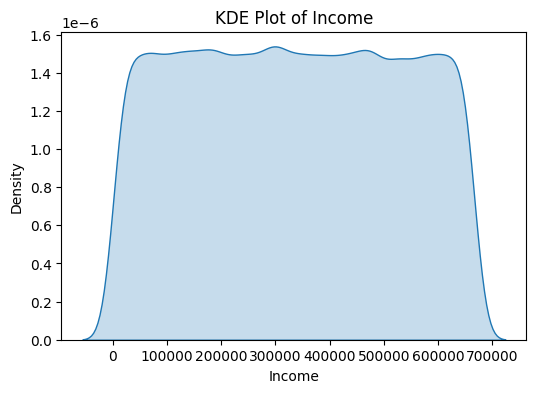

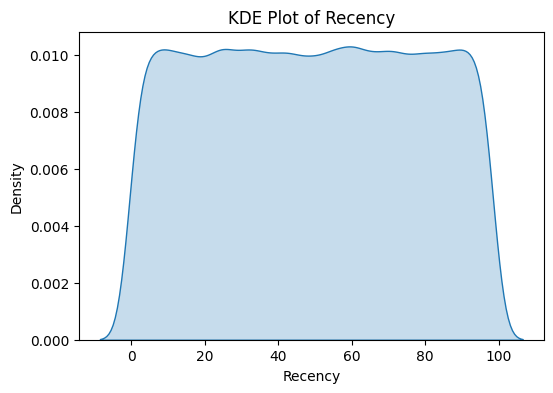

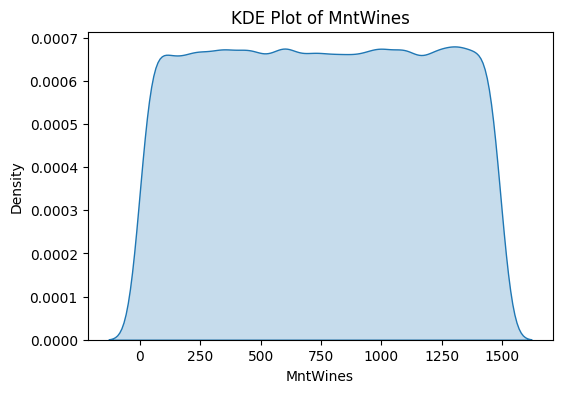

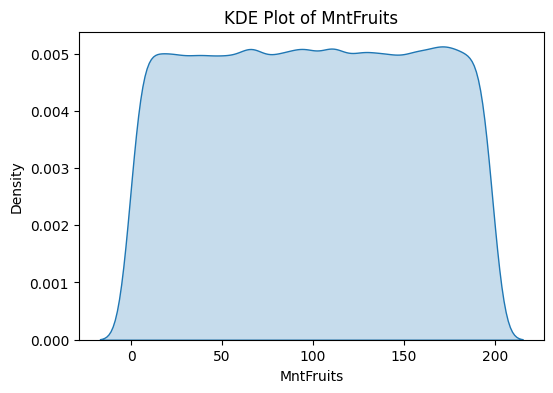

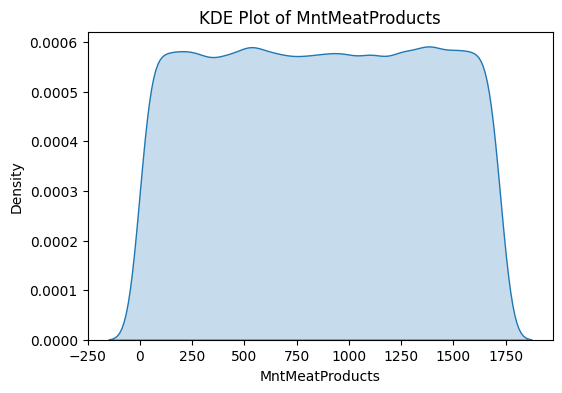

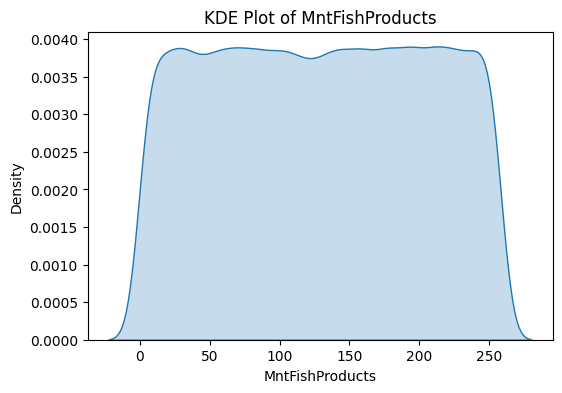

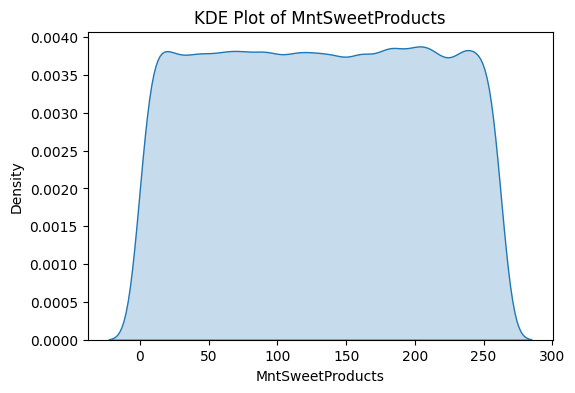

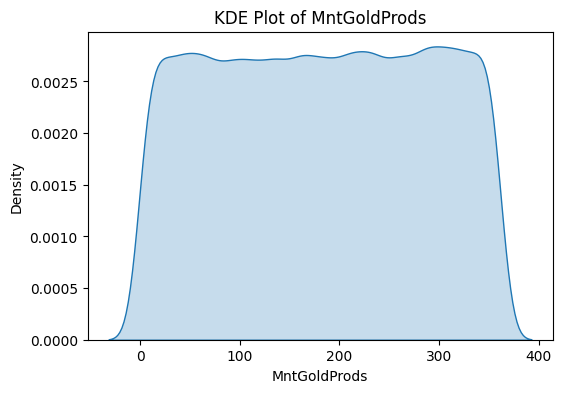

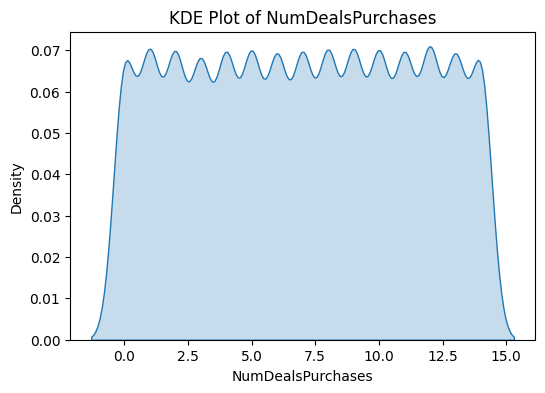

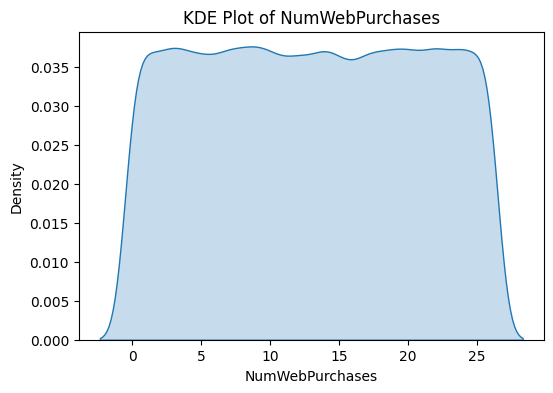

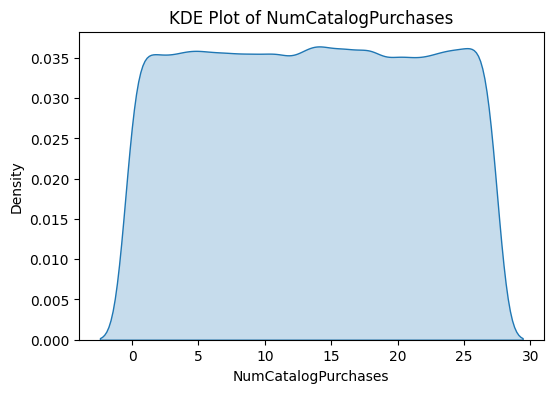

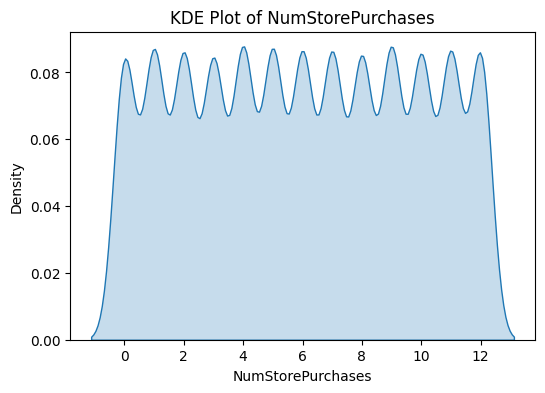

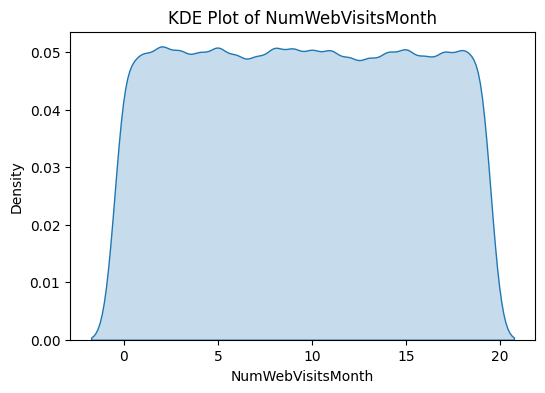

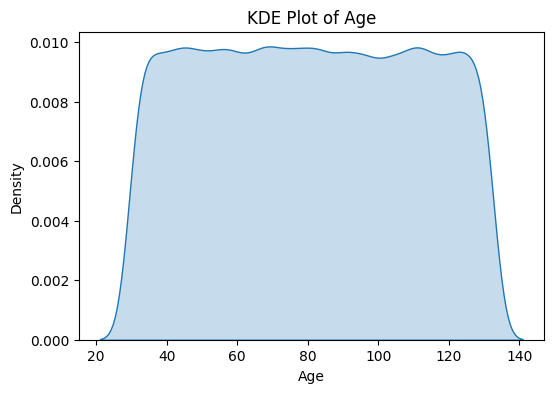

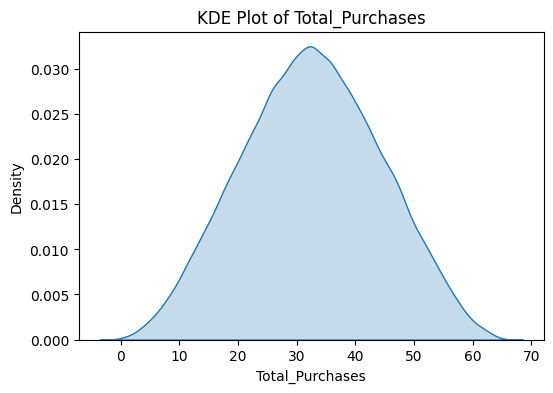

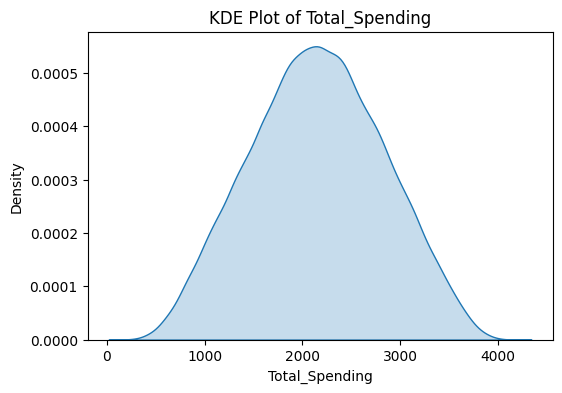

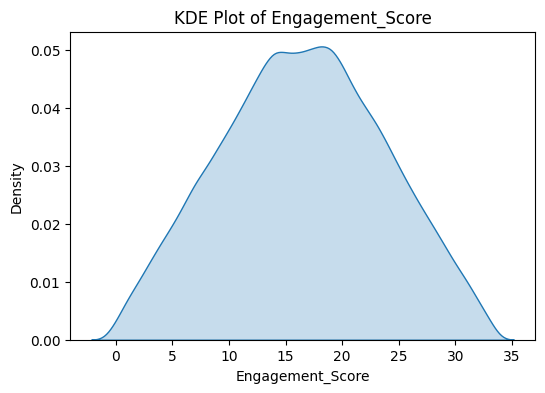

In [10]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.show()


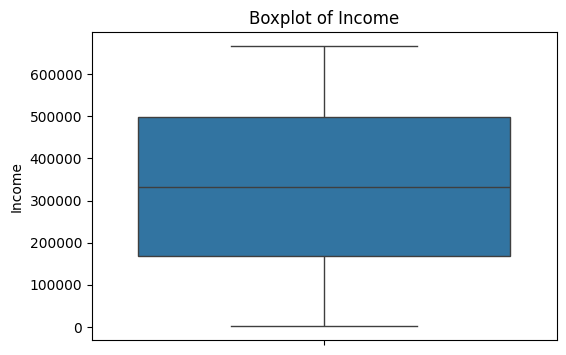

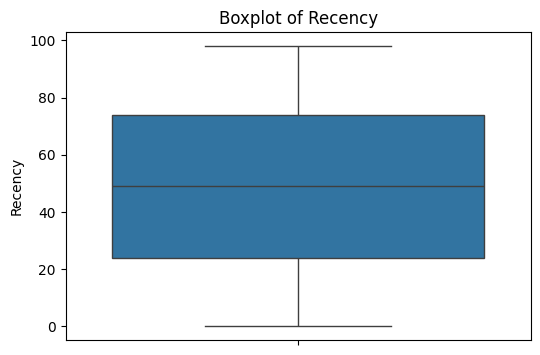

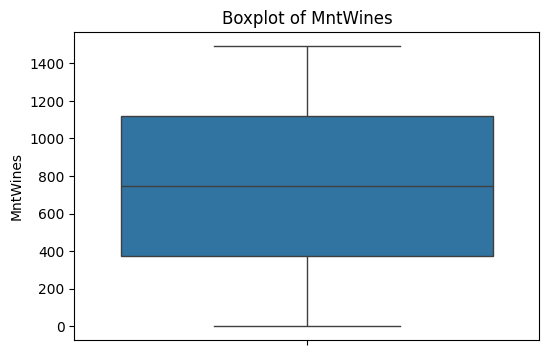

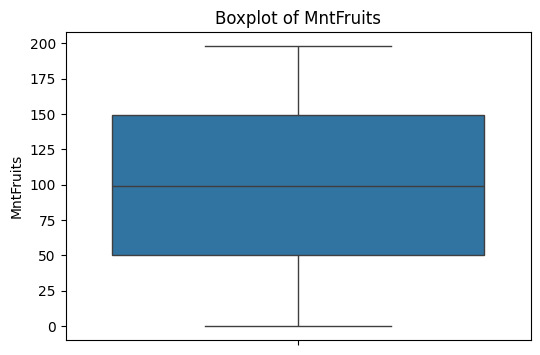

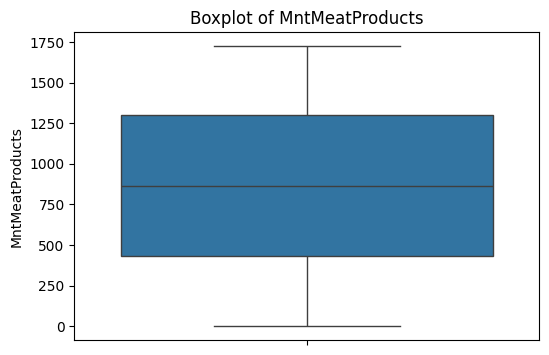

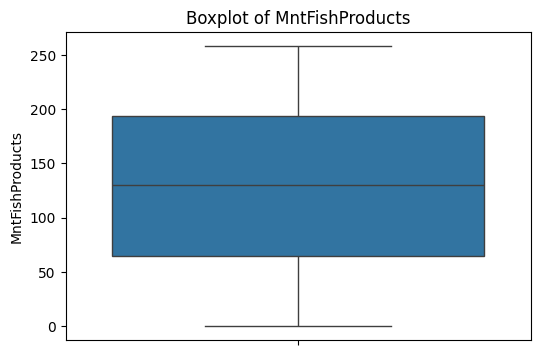

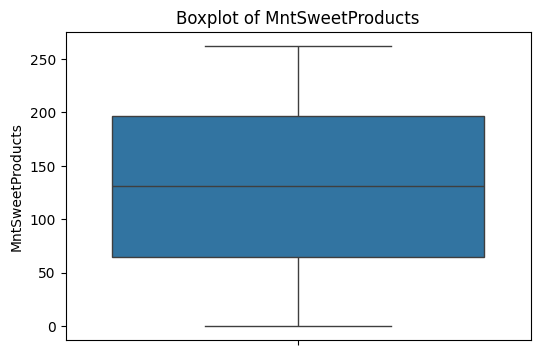

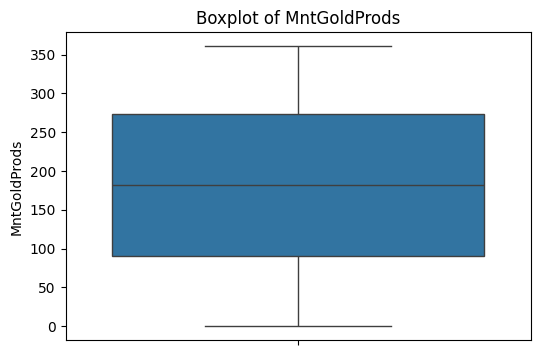

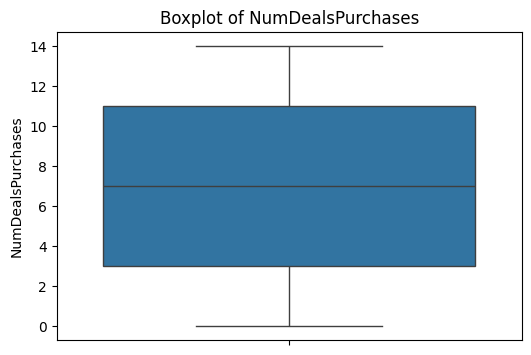

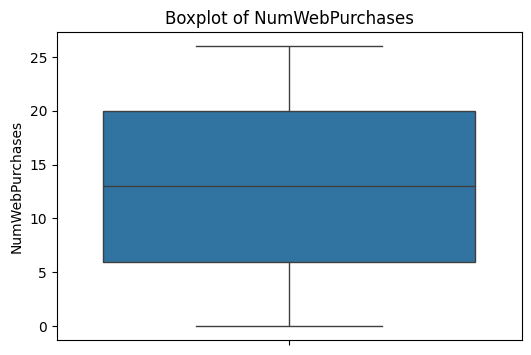

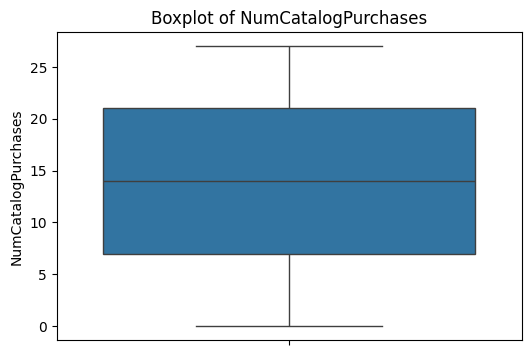

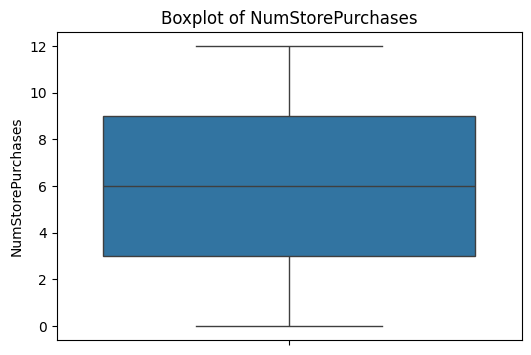

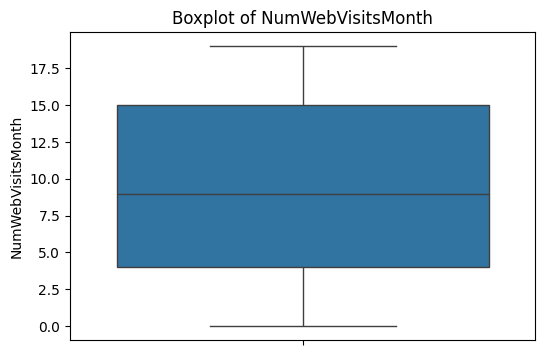

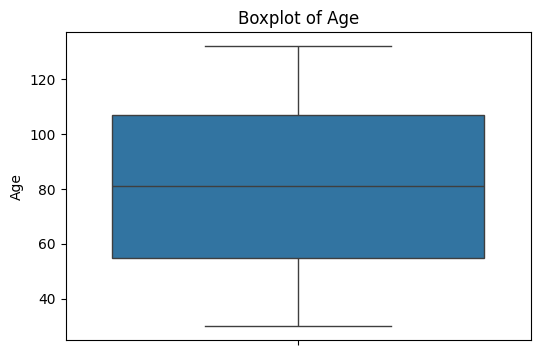

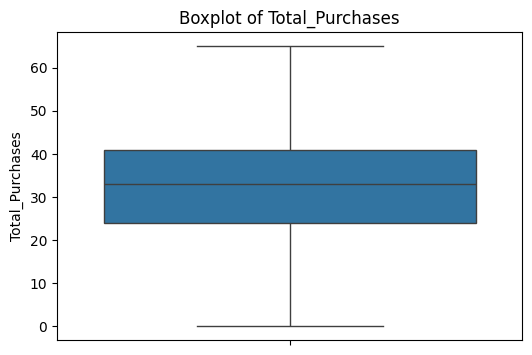

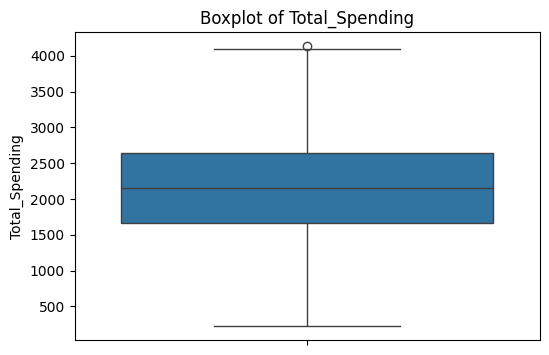

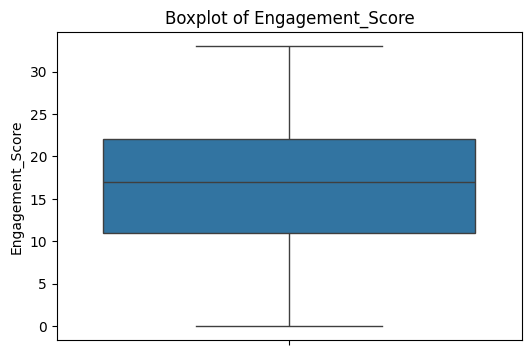

In [11]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### 1. Check for Low Variance
- If a column has little variation, it might not contribute much to clustering.

In [12]:
low_variance_cols = df[num_cols].var()[df[num_cols].var() < 0.01].index
print("Low variance columns:", list(low_variance_cols))



Low variance columns: []


In [13]:
cols = ['Kidhome', 'Teenhome', 
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 
       'NumChildren', 'NumAcceptedCmp']
cols.extend(cat_cols)
len(cols)

14

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_204\3440092266.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_204\3440092266.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_204\3440092266.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


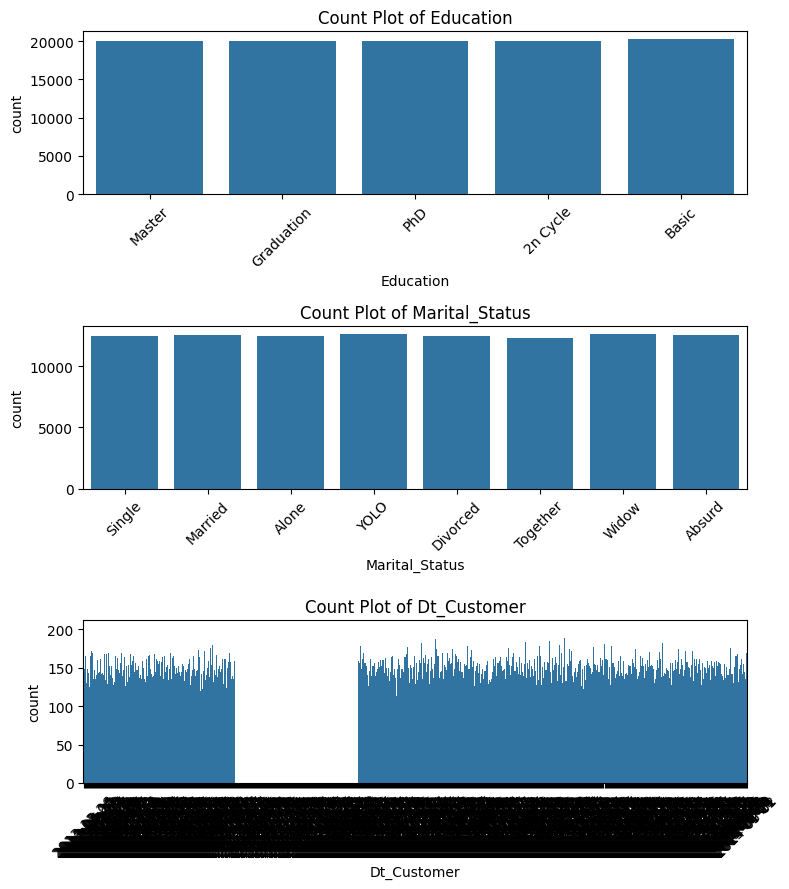

In [14]:

fig, axes = plt.subplots(nrows=len(cat_cols), figsize=(8, len(cat_cols) * 3))

for ax, col in zip(axes, cat_cols):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


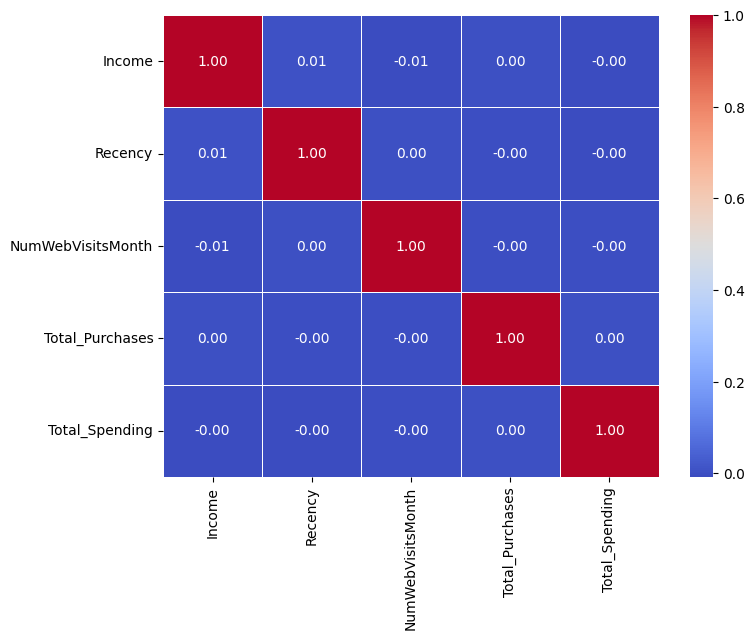

In [15]:


# Selecting only the most relevant numerical columns
heatmap_cols = ['Income', 'Recency', 'NumWebVisitsMonth', 'Total_Purchases', 'Total_Spending']

# Compute correlation using Spearman (handles skewed data better and is faster)
corr_matrix = df[heatmap_cols].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(8, 6))  # Smaller figure for faster rendering
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidth=0.5)
plt.show()


### Observations from the Heatmap:
- Low Correlation Among Variables: Most correlation values are close to 0, indicating weak relationships between features.

- Strong Self-Correlation: The diagonal elements are all 1, which is expected since a variable is always perfectly correlated with itself.

In [16]:
# Drop irrelevant/redundant columns
drop_cols = ['Dt_Customer', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 
             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 
             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases', 
             'Year_Birth']  # Year_Birth is now replaced by 'Age'

df.drop(columns=drop_cols, inplace=True)


In [17]:


le = LabelEncoder()
cat_col = ['Education', 'Marital_Status']  # Removed extra comma

for col in cat_col:
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure column is string before encoding


## Outlier analysis

In [18]:
numerical_cols = ['Income', 'Recency', 'Total_Spending', 'Total_Purchases', 
                  'Engagement_Score', 'NumChildren', 'NumAcceptedCmp']


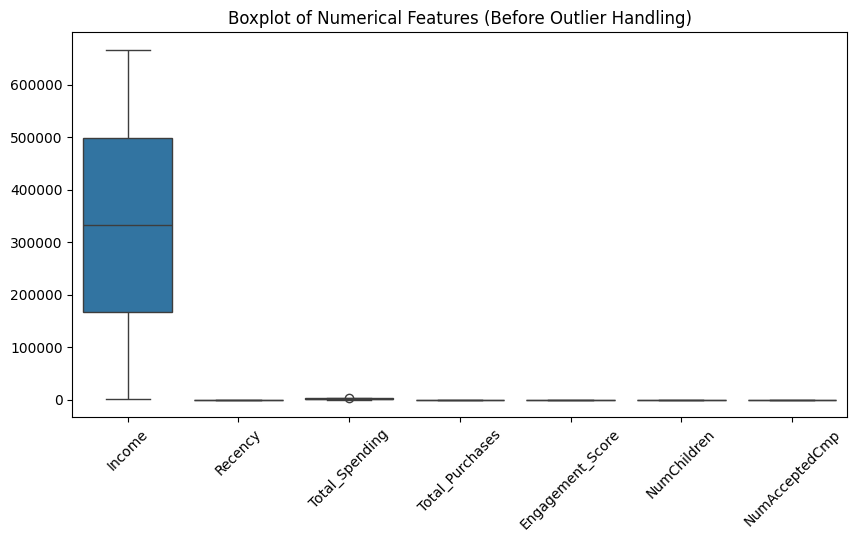

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Before Outlier Handling)")
plt.show()


In [20]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))


In [21]:

print("\nNumber of Outliers per Column:")
print(outlier_mask.sum())


Number of Outliers per Column:
Income              0
Recency             0
Total_Spending      1
Total_Purchases     0
Engagement_Score    0
NumChildren         0
NumAcceptedCmp      0
dtype: int64


In [22]:
def cap_outliers(df, numerical_cols):
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply the function
df = cap_outliers(df, numerical_cols)


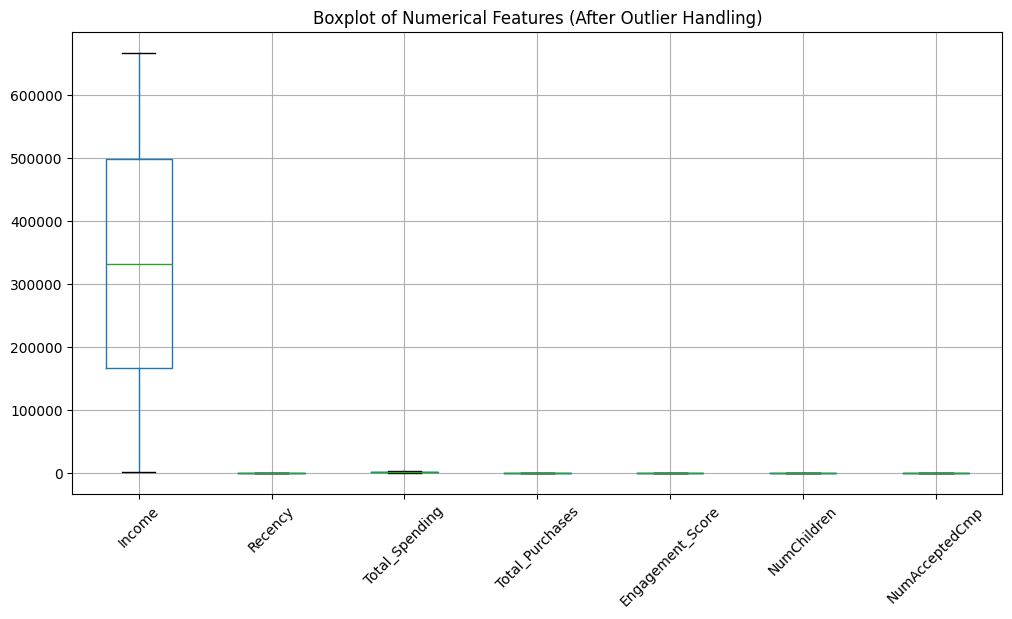

In [23]:
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features (After Outlier Handling)")
plt.show()


In [24]:

print("\nNumber of Outliers per Column:")
print(outlier_mask.sum())


Number of Outliers per Column:
Income              0
Recency             0
Total_Spending      1
Total_Purchases     0
Engagement_Score    0
NumChildren         0
NumAcceptedCmp      0
dtype: int64


In [25]:
from sklearn.preprocessing import MinMaxScaler


numerical_cols = ['Income', 'Recency', 'Total_Spending', 'Total_Purchases', 
                  'Engagement_Score', 'NumAcceptedCmp']


scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


print(df.head())

   ID  Education  Marital_Status    Income   Recency  AcceptedCmp3  \
0   1          3               4  0.737013  0.316327             1   
1   2          3               3  0.770295  0.234694             1   
2   3          2               1  0.781398  0.948980             1   
3   4          4               7  0.345742  0.132653             0   
4   5          0               2  0.334173  0.663265             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             1             0             0             0         0   
1             1             0             0             0         0   
2             0             0             0             1         0   
3             1             1             0             1         0   
4             0             0             1             1         0   

   Z_CostContact  Z_Revenue  Response  Total_Spending  Total_Purchases  \
0              3         11         1        0.686887         0.430769   
1   

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Response']) 
y = df['Response']  # Target variable (only for analysis, not clustering)




print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

In [ ]:
cat_cols_idx = [X_train.columns.get_loc(col) for col in ['Education', 'Marital_Status', 'Age_Group', 'Gen_Group']]

# Apply K-Prototypes clustering on training set
kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42)
clusters_train = kproto.fit_predict(X_train, categorical=cat_cols_idx)


In [ ]:

# Assign cluster labels to training data
X_train['Cluster'] = clusters_train

- We merge the cluster labels with Response to analyze how many customers from each cluster responded.

In [ ]:
# Merge clusters with Response for analysis
train_cluster_analysis = X_train.copy()
train_cluster_analysis['Response'] = y_train  # Add Response back for analysis

In [ ]:
# Analyze response rate in each cluster
cluster_response_rates = train_cluster_analysis.groupby("Cluster")["Response"].mean()
print("\nResponse Rate per Cluster (Train Set):")
print(cluster_response_rates)


In [ ]:
# Visualize response rates across clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_response_rates.index, y=cluster_response_rates.values, palette='viridis')
plt.xlabel("Cluster")
plt.ylabel("Response Rate")
plt.title("Response Rate per Cluster")
plt.show()

- This helps identify which customer segment is most/least likely to respond.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Train a classifier to see if clusters predict response well
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train[['Cluster']], y_train)  # Only using clusters as feature

# Predict on test data
clusters_test = kproto.predict(X_test, categorical=cat_cols_idx)
y_pred = clf.predict(pd.DataFrame(clusters_test, columns=['Cluster']))




- Uses RandomForestClassifier to see if Cluster can predict Response.
- Predicts on the test set and compares against actual responses.

In [ ]:
# Classification report
print("\nClassification Report (Cluster → Response):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Response', 'Response'], yticklabels=['No Response', 'Response'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
cat_cols_idx = [df.columns.get_loc(col) for col in categorical_columns]  # Categorical column indices

# Apply K-Prototypes
kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42, verbose=1)
clusters = kproto.fit_predict(df, categorical=cat_cols_idx)
df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Cluster'], palette='viridis')
plt.title("Customer Clusters")
plt.show()

# Display cluster characteristics
print("\nCluster Characteristics:")
print(df.groupby("Cluster").mean())

to improve accuracy 
- 1. Use More Features for Classification
- 2. Train a Better Model
- 3. Handle Class Imbalance (if needed)

In [ ]:
# Convert to numpy array
X = df.values
cat_cols_idx = [df.columns.get_loc(col) for col in cat_col]

# Find the optimal number of clusters using Elbow Method
cost = []
k_range = range(2, 10)
for k in k_range:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    clusters = kproto.fit_predict(X, categorical=cat_cols_idx)
    cost.append(kproto.cost_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, cost, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Prototypes with the best K (assume K=4 based on elbow method)
kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_cols_idx)
df['Cluster'] = clusters

# Compute Silhouette Score
silhouette_avg = silhouette_score(X, clusters, metric='euclidean')
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Visualize Clusters
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.show()

# Display cluster characteristics
print('\nCluster Characteristics:')
print(df.groupby('Cluster').mean())

In [26]:
num_cols = ['Income', 'Recency', 'Total_Spending', 'Total_Purchases', 'Engagement_Score']
cat_cols = ['Education', 'Marital_Status']


In [27]:
df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])


In [28]:
# Scale numerical columns
df_encoded[num_cols] = StandardScaler().fit_transform(df_encoded[num_cols])


In [29]:
# Convert to numpy array
X = df_encoded[num_cols + cat_cols].values
cat_idx = [df_encoded.columns.get_loc(col) for col in cat_cols]


In [30]:
# Sample data for elbow method to speed up
X_sample = X[np.random.choice(X.shape[0], 500, replace=False)]  # Adjust sample size as needed


In [31]:
# Find optimal clusters using Elbow Method
cost = []
for k in range(2, 6):
    kproto = KPrototypes(n_clusters=k, init='Huang', n_jobs=-1, random_state=42)
    kproto.fit(X_sample, categorical=cat_idx)
    cost.append(kproto.cost_)


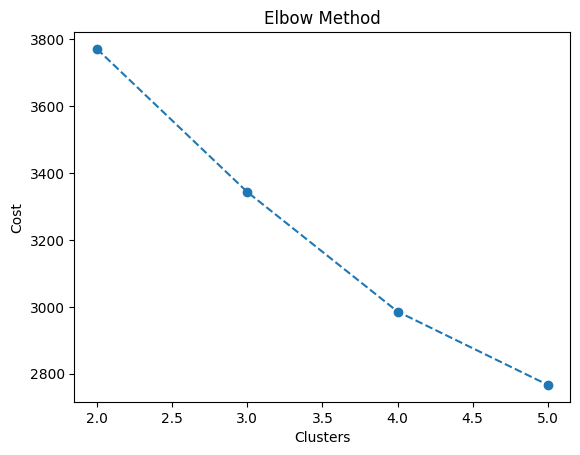

In [32]:
# Plot Elbow
plt.plot(range(2, 6), cost, marker='o', linestyle='--')
plt.xlabel('Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method')
plt.show()


In [33]:
kproto = KPrototypes(n_clusters=4, init='Huang', n_jobs=-1, random_state=42)
df['Cluster'] = kproto.fit_predict(X, categorical=cat_idx)


In [36]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score (on numerical columns only for efficiency)
silhouette_avg = silhouette_score(df_encoded[num_cols], df['Cluster'], metric='euclidean')
print(f'Silhouette Score: {silhouette_avg:.3f}')


Silhouette Score: -0.002


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_204\2152918815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette='viridis')


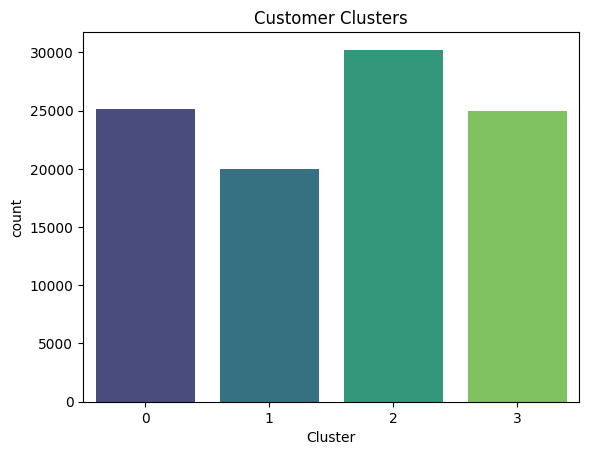

In [37]:
# Cluster Count Plot
sns.countplot(x=df['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.show()

In [38]:
print(df.groupby('Cluster').mean())

                   ID  Education  Marital_Status    Income   Recency  \
Cluster                                                                
0        50247.848360   3.202797        1.700466  0.499363  0.502647   
1        50120.496095   0.874900        0.870294  0.498056  0.496665   
2        50178.008270   0.751323        4.924970  0.500500  0.501322   
3        50001.219170   3.195027        5.703756  0.497172  0.498522   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
Cluster                                                                         
0            0.505000      0.495518      0.502570      0.495478      0.506395   
1            0.506608      0.503604      0.497197      0.499149      0.501602   
2            0.499140      0.500397      0.503606      0.496824      0.501886   
3            0.499319      0.503203      0.498799      0.500841      0.497598   

         Complain  Z_CostContact  Z_Revenue  Response  Total_Spending  \
Cluster

In [ ]:

from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA



# Convert DataFrame to NumPy array
X = df[num_cols + cat_cols].values
cat_cols_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Find optimal K using Elbow Method
cost = []
k_range = range(2, 10)

for k in k_range:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    clusters = kproto.fit_predict(X, categorical=cat_cols_idx)
    cost.append(kproto.cost_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, cost, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K')
plt.show()

# Fit K-Prototypes with optimal K (assume K=4 based on elbow)
optimal_k = 4  
kproto = KPrototypes(n_clusters=optimal_k, init='Huang', random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_cols_idx)
df['Cluster'] = clusters

# Visualize Cluster Counts
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.show()

# Cluster Characterization
print('\nCluster Characteristics:')
print(df.groupby('Cluster').mean())

# Visualize Clusters using PCA (First 2 Principal Components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('PCA Visualization of Clusters')
plt.show()
